# 준비

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [5]:
data = pd.read_csv('infra_korea.csv', encoding='euc-kr', index_col=['EMD_NM'])

In [3]:
# data = pd.read_csv('C:/Users/user/Desktop/DataAnalysisStudy/Ele_Charge_Analysis/INFRA_real.csv')

In [6]:
data

,ORG_NUM,TRAD,CONCERT,OLD,MART,LIB,ART,MUS,MED,COMM,SPORT,CHARGE
0,1430,0,0,0,0,3,0,0,0,0,3,0
1,1431,1,2,1,0,13,1,0,13,3,3,3
2,1556,0,0,1,0,0,0,0,0,0,1,1
3,1560,0,0,3,0,0,0,0,3,0,1,0
4,1429,0,0,1,0,6,0,0,3,1,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...
199,131,0,0,0,0,1,0,0,0,0,1,1
200,97,0,0,1,0,0,0,0,0,0,5,0
201,168,0,0,0,0,0,1,1,0,0,0,0
202,100,0,0,0,0,0,0,0,0,0,0,0


In [7]:
data.head()

,ORG_NUM,TRAD,CONCERT,OLD,MART,LIB,ART,MUS,MED,COMM,SPORT,CHARGE
0,1430,0,0,0,0,3,0,0,0,0,3,0
1,1431,1,2,1,0,13,1,0,13,3,3,3
2,1556,0,0,1,0,0,0,0,0,0,1,1
3,1560,0,0,3,0,0,0,0,3,0,1,0
4,1429,0,0,1,0,6,0,0,3,1,6,3


In [8]:
data.describe()

,ORG_NUM,TRAD,CONCERT,OLD,MART,LIB,ART,MUS,MED,COMM,SPORT,CHARGE
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,626.416667,0.112745,0.107843,0.465686,0.107843,1.720588,0.083333,0.039216,1.303922,0.475490,2.710784,0.544118
std,454.959445,0.423490,0.407004,0.808696,0.407004,3.292830,0.394440,0.194585,2.529780,0.778015,4.029409,1.061189
min,97.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,406.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,523.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,580.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,2.000000,1.000000,3.000000,1.000000
max,2075.000000,3.000000,3.000000,4.000000,3.000000,16.000000,4.000000,1.000000,18.000000,4.000000,20.000000,5.000000


# 독립변수, 종속변수 선언

In [328]:
# 독립변수 ( data )
X = data.iloc[:, :10]

In [329]:
# 종속변수 ( target )
y = data.iloc[:,-1]

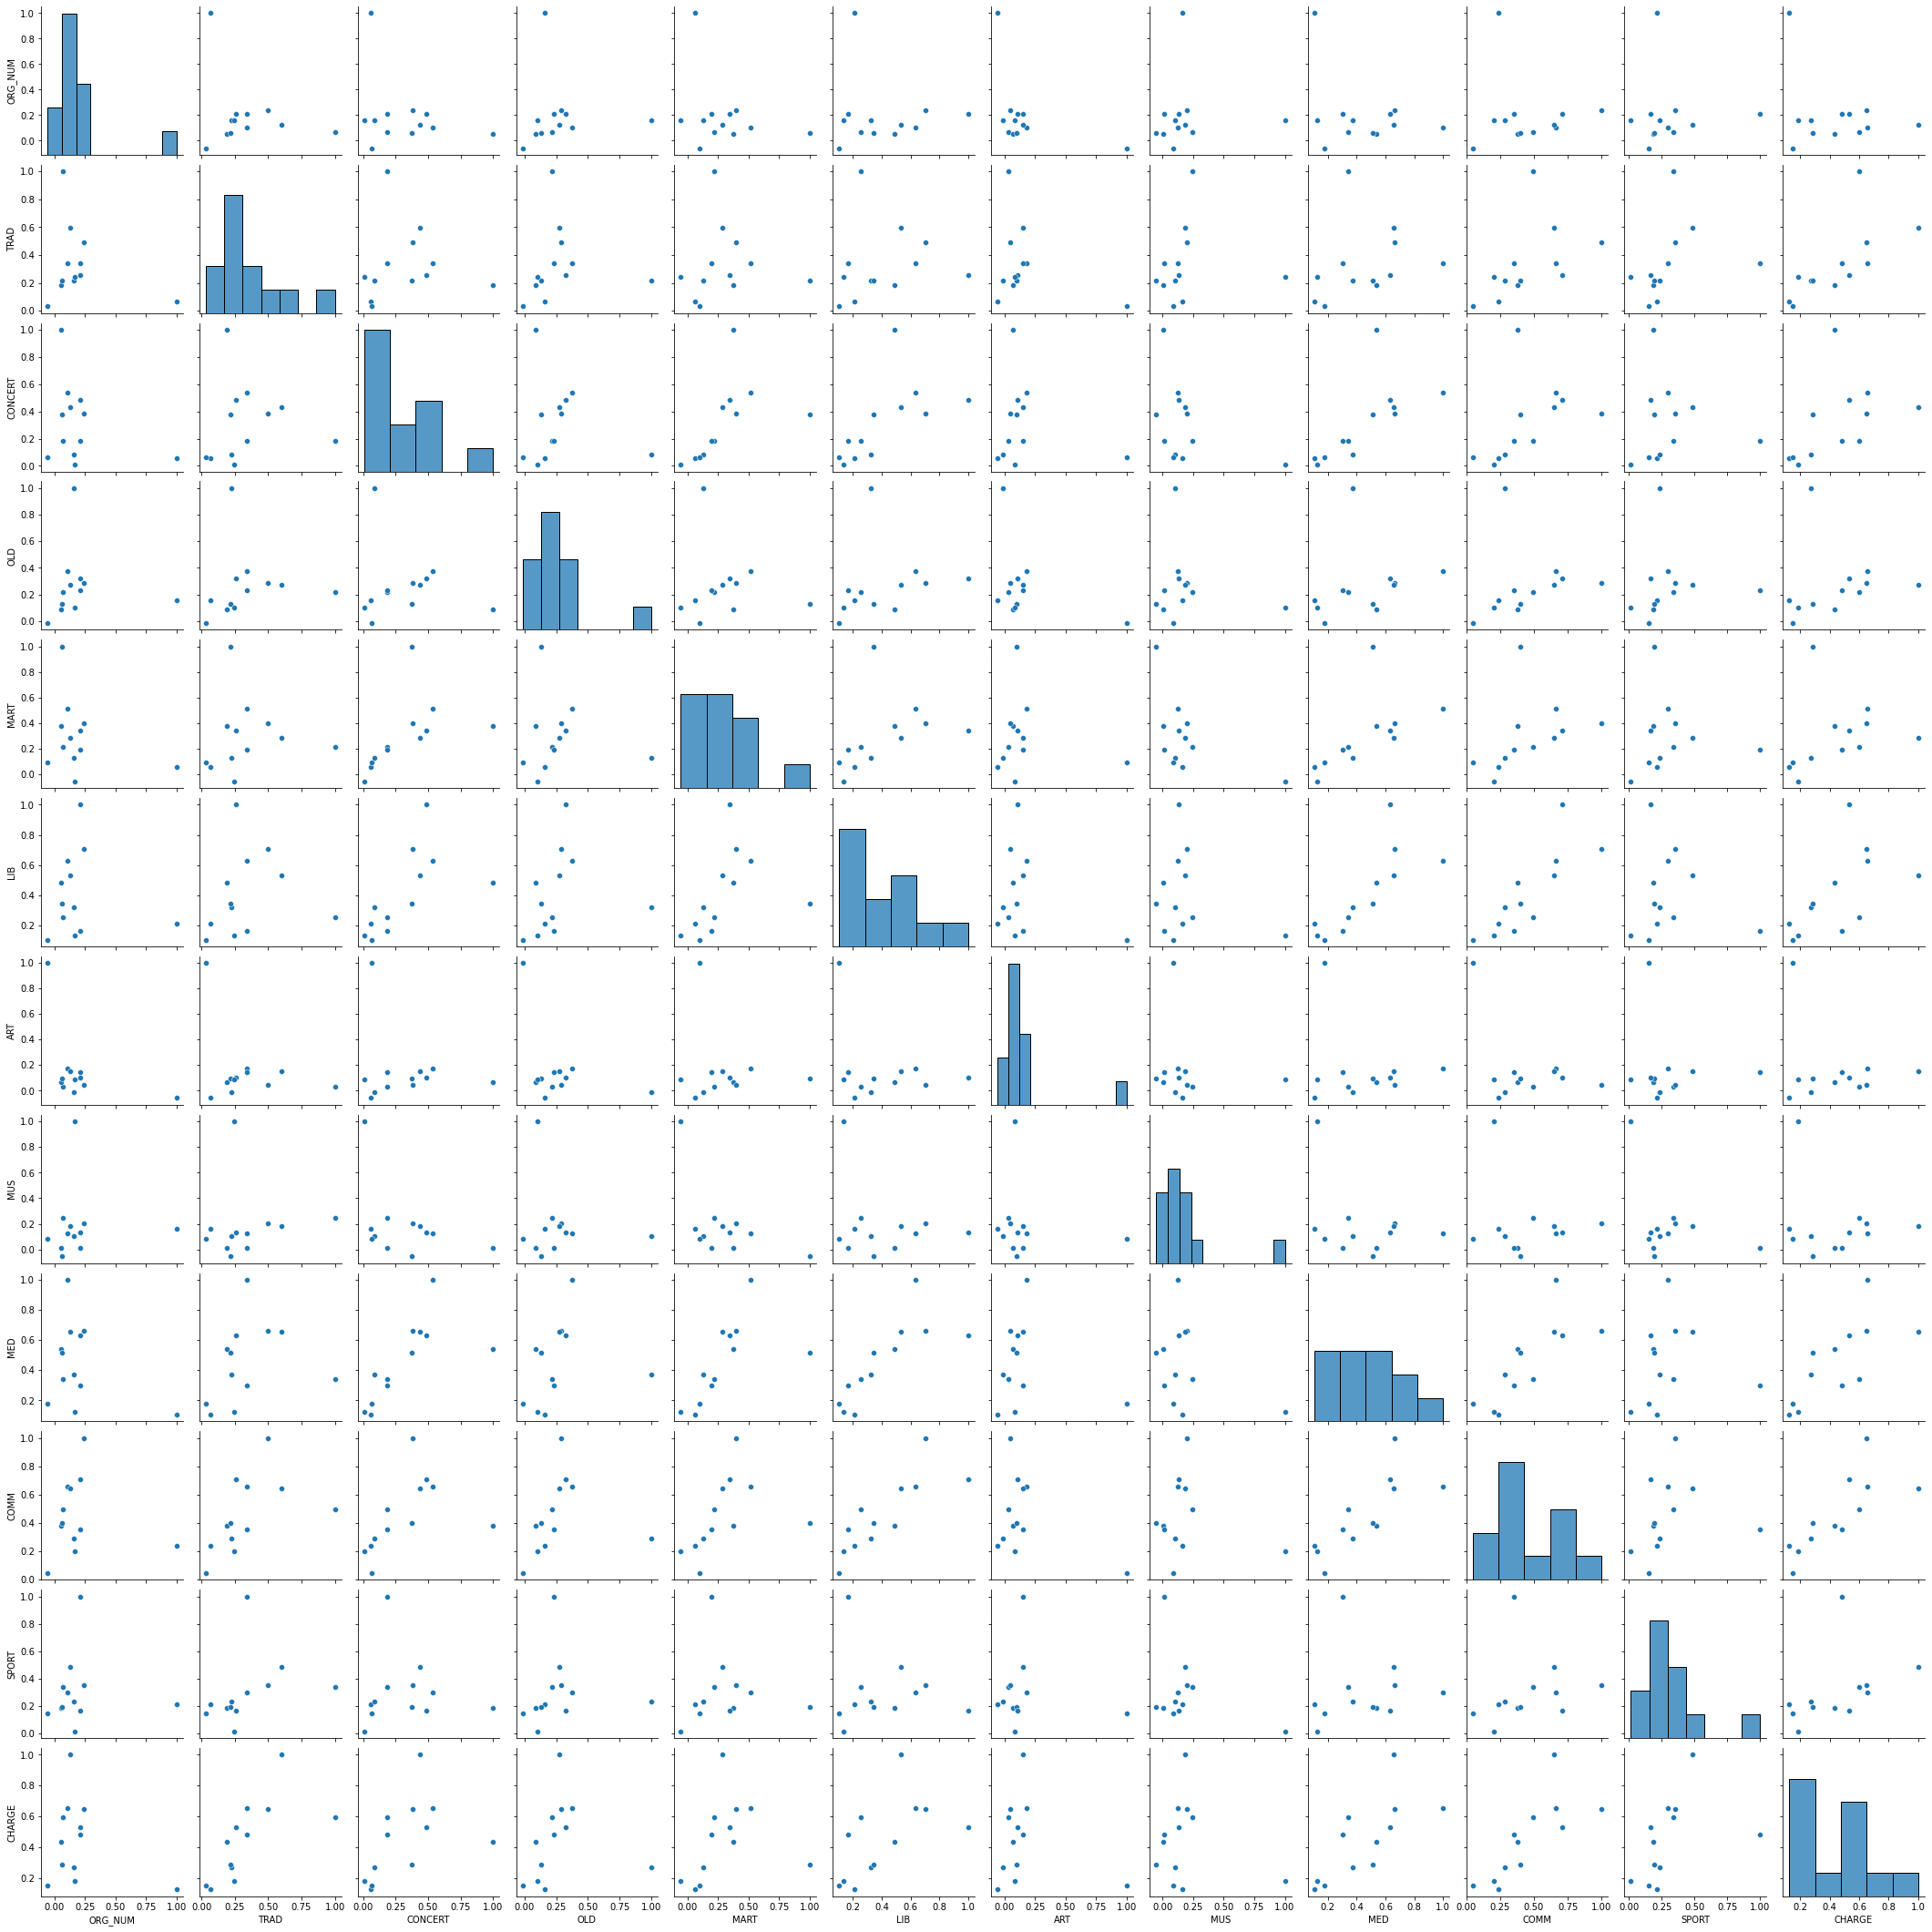

In [5]:
# 상관계수 그래프
sns.pairplot(data.corr())

In [235]:
# 훈련, 테스트 데이터 분리 - 원본 데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1004)

## VIF 높은 컬럼 제거하고 선언 ( 때에 따라 바꿔가며 진행 )

In [28]:
data2 = data.drop(['COMM', 'LIB'], axis=1)

In [29]:
X = data2.iloc[:, :-1]
y = data2.iloc[:, -1]

# 표준화
## Strandard Scaler

In [94]:
# Standard Scaler  ( 표준화 )
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_data = std.fit_transform(data.iloc[:, :])

In [95]:
# 표준화된 행렬 -> 데이터프레임 변환 
scaled_df = pd.DataFrame(std_data, columns=['TRAD', 'CONCERT', 'OLD', 'MART', 'LIB', 'ART', 'MUS', 'MED', 'COMM', 'SPORT', 'CHARGE'])

In [96]:
# 독립변수 ( data )
X = scaled_df.iloc[:,:10]

In [97]:
# 종속변수 ( target )
y = scaled_df.iloc[:,-1]

In [98]:
# 흔련, 테스트 데이터 분리 - Scaled Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

## Min-Max Scaler

In [347]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.iloc[:, :])

In [348]:
# 표준화된 행렬 -> 데이터프레임 변환 
scaled_df = pd.DataFrame(scaled_data, columns=['TRAD', 'CONCERT', 'OLD', 'MART', 'LIB', 'ART', 'MUS', 'MED', 'COMM', 'SPORT', 'CHARGE'])

In [349]:
# 독립변수 ( data )
X = scaled_df.iloc[:,:10]

In [350]:
# 종속변수 ( target )
y = scaled_df.iloc[:,-1]

In [351]:
# 흔련, 테스트 데이터 분리 - Scaled Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# 모델 학습
## Multi-regression

In [482]:
model = LinearRegression()

In [483]:
model.fit(X_train, y_train)

LinearRegression()

In [484]:
print(f'훈련 세트의 정확도 : {model.score(X_train, y_train)}')
print(f'테스트 세트의 정확도 : {model.score(X_test, y_test)}')
print(f'사용한 특성의 수 : {np.sum(model.coef_ != 0)}')

훈련 세트의 정확도 : 0.6263871000342032
테스트 세트의 정확도 : 0.5978330371101949
사용한 특성의 수 : 8


In [485]:
model_pred = model.predict(X_test)

In [486]:
residual = y_test - model_pred

In [487]:
print(f'잔차 평균 : {np.mean(residual)}')

잔차 평균 : 0.023914079211499358


In [488]:
residual.describe

<bound method NDFrame.describe of EMD_NM
광산구_산수동   -0.269655
내남동       -0.340609
광산구_우산동    0.497327
송하동       -0.454698
요기동       -0.109619
             ...   
명도동       -0.162965
덕흥동       -0.255747
월남동       -0.269655
대산동       -0.095711
서봉동       -0.162965
Name: CHARGE, Length: 64, dtype: float64>

## Lasso

In [489]:
lasso = Lasso(alpha=0.5).fit(X_train, y_train)

In [490]:
print(f'훈련 세트의 정확도 : {lasso.score(X_train, y_train)}')
print(f'테스트 세트의 정확도 : {lasso.score(X_test, y_test)}')
print("사용한 특성의 수 : {}".format(np.sum(lasso.coef_ != 0)))
print("사용한 max_iter : {}".format(lasso.n_iter_))

훈련 세트의 정확도 : 0.4658191483179105
테스트 세트의 정확도 : 0.4417730780687251
사용한 특성의 수 : 2
사용한 max_iter : 5


In [491]:
lasso.coef_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.1907105 , 0.04331964])

In [492]:
lasso_pred = lasso.predict(X_test)

In [493]:
lasso_residual = y_test - lasso_pred

In [494]:
print(f'잔차 평균 : {np.mean(lasso_residual)}')

잔차 평균 : -0.04910597973134931


## Ridge

In [495]:
ridge = Ridge().fit(X_train, y_train)

In [496]:
ridge.coef_

array([ 0.84859268,  0.25612135, -0.06563203,  0.0162328 ,  0.02456849,
        0.13060922,  0.18083402,  0.05441047])

In [497]:
print(f'훈련 세트의 정확도 : {ridge.score(X_train, y_train)}')
print(f'테스트 세트의 정확도 : {ridge.score(X_test, y_test)}')
print("사용한 특성의 수 : {}".format(np.sum(ridge.coef_ != 0)))
print("사용한 max_iter : {}".format(ridge.n_iter_))

훈련 세트의 정확도 : 0.6261538165513458
테스트 세트의 정확도 : 0.5970656698997816
사용한 특성의 수 : 8
사용한 max_iter : None


In [498]:
# 예측 데이터 도출
ridge_pred = ridge.predict(X_test)

In [499]:
# 타겟 데이터와 예측 데이터 사이의 잔차 계산
ridge_residual = y_test - ridge_pred

In [500]:
print(f'잔차 평균 : {np.mean(ridge_residual)}')

잔차 평균 : 0.01894509012050098


In [501]:
# R2 제곱 ( = 정확도, 결정계수 )
from sklearn.metrics import r2_score
r2_score(y_test, ridge_pred, sample_weight=None, multioutput='uniform_average')

0.5970656698997816

## Elastic Net

In [133]:
from sklearn.linear_model import ElasticNet

EN = ElasticNet(alpha=0.5)
EN.fit(X_train, y_train)

ElasticNet(alpha=0.5)

In [134]:
print(f'train data의 정확도 : {EN.score(X_train, y_train)}')
print(f'test data의 정확도 : {EN.score(X_test, y_test)}')
print(f'ElasticNet의 정확도 : {EN.score(X, y)}')

train data의 정확도 : 0.4568872643753713
test data의 정확도 : 0.5581030454982842
ElasticNet의 정확도 : 0.4744213039337324


## Ensemble Model
### GradientBoostingRegressor

In [105]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(random_state=42, n_estimators=50)
gbm.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=50, random_state=42)

In [106]:
print(f'훈련 세트의 정확도 : {gbm.score(X_train, y_train)}')
print(f'테스트 세트의 정확도 : {gbm.score(X_test, y_test)}')
print(f'GBR R2 : {gbm.score(X, y)}')

훈련 세트의 정확도 : 0.9037118647840419
테스트 세트의 정확도 : 0.6916103383808065
GBR R2 : 0.8673195448092976


### KNeighborsRegressor

In [82]:
from sklearn.neighbors import KNeighborsRegressor

KNR = KNeighborsRegressor(n_neighbors=5)
KNR.fit(X_train, y_train)

KNeighborsRegressor()

In [83]:
print(f'훈련 세트의 정확도 : {KNR.score(X_train, y_train)}')
print(f'테스트 세트의 정확도 : {KNR.score(X_test, y_test)}')
print(f'KNR R2 : {KNR.score(X, y)}')

훈련 세트의 정확도 : 0.49314938625349325
테스트 세트의 정확도 : 0.5654525862068966
KNR R2 : 0.5080476980320079


### SVM ( Support Vector Regressor )

In [99]:
# SVM은 가급적 정규화 처리된 데이터로 진행
from sklearn.svm import SVR

SVR = SVR()
SVR.fit(X_train, y_train)

SVR()

In [100]:
print(f'훈련 세트의 정확도 : {SVR.score(X_train, y_train)}')
print(f'테스트 세트의 정확도 : {SVR.score(X_test, y_test)}')
print(f'KNR R2 : {SVR.score(X, y)}')

훈련 세트의 정확도 : 0.7628050042225452
테스트 세트의 정확도 : 0.3939315006790415
KNR R2 : 0.6995336181783618


# 모델별 결정계수 비교
## 표준화 방법별 비교

In [256]:
print('=== No Scaled data ===')
print('=== Test size = 0.2 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

=== No Scaled data ===
=== Test size = 0.2 ===
MLR R2: 0.5996636173465624
Lasso R2: 0.4650308322122455
Ridge R2: 0.6063137017820943


In [120]:
print('=== No Scaled data ===')
print('=== Test size = 0.33 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

=== No Scaled data ===
=== Test size = 0.33 ===
MLR R2: 0.5941409465343874
Lasso R2: 0.4657582803618161
Ridge R2: 0.6027104625945415


In [160]:
print('=== No Scaled data ===')
print('=== Test size = 0.44 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

=== No Scaled data ===
=== Test size = 0.44 ===
MLR R2: 0.577102712247221
Lasso R2: 0.4660266863613799
Ridge R2: 0.5888533138949572


In [282]:
print('=== Standard Scaled data ===')
print('=== Test size = 0.2 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

=== Standard Scaled data ===
=== Test size = 0.2 ===
MLR R2: 0.6434593333737193
Lasso R2: 0.22939987882594082
Ridge R2: 0.6436454772638673


In [93]:
print('=== Standard Scaled data ===')
print('=== Test size = 0.33 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

=== Standard Scaled data ===
MLR R2: 0.6344619555911336
Lasso R2: 0.28142232133130074
Ridge R2: 0.6349365361841097


In [186]:
print('=== Standard Scaled data ===')
print('=== Test size = 0.44 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

=== Standard Scaled data ===
=== Test size = 0.44 ===
MLR R2: 0.6041716212168606
Lasso R2: 0.3352215454524484
Ridge R2: 0.6065632786294773


In [308]:
print('=== Min-Max Scaled data ===')
print('=== Test size = 0.2 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

=== Min-Max Scaled data ===
=== Test size = 0.2 ===
MLR R2: 0.6041716212168607
Lasso R2: -0.0033941520045470686
Ridge R2: 0.633655887540103


In [67]:
print('=== Min-Max Scaled data ===')
print('=== Test size = 0.33 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

=== Min-Max Scaled data ===
MLR R2: 0.6344619555911337
Lasso R2: -0.002325627460820767
Ridge R2: 0.6358510383871747


In [211]:
print('=== Min-Max Scaled data ===')
print('=== Test size = 0.44 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

=== Min-Max Scaled data ===
=== Test size = 0.44 ===
MLR R2: 0.6041716212168607
Lasso R2: -0.0033941520045470686
Ridge R2: 0.633655887540103


# 다중공선성 확인

In [309]:
from statsmodels import api
ols = api.OLS(y, X)
result = ols.fit()

In [310]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 CHARGE   R-squared (uncentered):                   0.724
Model:                            OLS   Adj. R-squared (uncentered):              0.709
Method:                 Least Squares   F-statistic:                              48.00
Date:                Tue, 09 Aug 2022   Prob (F-statistic):                    6.39e-46
Time:                        10:55:48   Log-Likelihood:                          120.04
No. Observations:                 193   AIC:                                     -220.1
Df Residuals:                     183   BIC:                                     -187.5
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## VIF ( Variance Inflation Factors ) 확인

In [311]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [312]:
def feature_engineering_XbyVIF(X):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X.values, i)
                         for i in range(X.shape[1])]
    vif['Feature'] = X.columns
    return vif

In [313]:
vif = feature_engineering_XbyVIF(X)

In [314]:
print(vif)

   VIF_Factor  Feature
0    1.555524     TRAD
1    1.701851  CONCERT
2    1.616663      OLD
3    1.515209     MART
4    3.306775      LIB
5    1.141001      ART
6    1.167651      MUS
7    3.346976      MED
8    4.218906     COMM
9    1.680447    SPORT


# 시각화
## 변수별 회귀계수의 분포 시각화

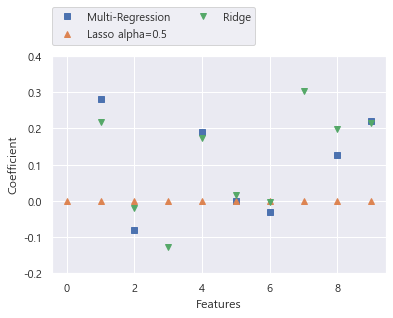

In [220]:
plt.plot(model.coef_, 's', label="Multi-Regression")
plt.plot(lasso.coef_, '^', label="Lasso alpha=0.5")
plt.plot(ridge.coef_, 'v', label="Ridge")

plt.legend(ncol=2, loc=(0, 1.05))
plt.xlabel("Features")
plt.ylabel("Coefficient")

# plt.hlines(0, 0, len(lr.coef_))

plt.ylim(-0.2, 0.4)
plt.show()

## 모델별 잔차 시각화

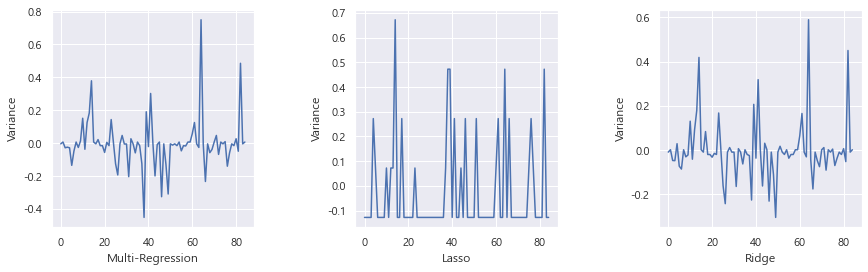

In [222]:
xx = range(85)
plt.subplot(1, 3, 1)
plt.plot(xx, residual, label='Multi-Regression_residual')
plt.xlabel('Multi-Regression')
plt.ylabel('Variance')

plt.subplot(1, 3, 2)
plt.plot(xx, lasso_residual, label='lasso_residual')
plt.xlabel('Lasso')
plt.ylabel('Variance')

plt.subplot(1, 3, 3)
plt.plot(xx, ridge_residual, label='ridge_residual')
plt.xlabel('Ridge')
plt.ylabel('Variance')

plt.subplots_adjust(wspace=0.5, right=2)
plt.show()

# 오버샘플링
## imblearn.over_sampling

In [34]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler

In [95]:
# SMOTE
X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)

In [95]:
# ADASYN
X_train, y_train = ADASYN(random_state=42).fit_resample(X_train, y_train)

In [84]:
# 랜덤 오버 샘플링
X_train, y_train = RandomOverSampler(random_state=42).fit_resample(X_train, y_train)

## 선형회귀의 추정치로 데이터 생성

In [454]:
over_list = pd.DataFrame()

In [455]:
over_data = data.iloc[:, :]

In [456]:
over_data.columns.values

array(['TRAD', 'CONCERT', 'OLD', 'MART', 'LIB', 'ART', 'MUS', 'MED',
       'COMM', 'SPORT', 'CHARGE'], dtype=object)

In [457]:
model = LinearRegression()

In [458]:
# 독립변수를 종속변수 삼아 값 추정
for i in range(len(over_data.columns.values)):
    over_y = over_data.loc[:, f'{over_data.columns.values[i]}']
    over_X = over_data[over_data.columns.difference([f'{over_data.columns.values[i]}'])]

    over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, random_state=11, test_size=0.33)

    model.fit(over_X_train, over_y_train)

    y_pred = model.predict(over_X_test)

    over_list[f'{over_data.columns.values[i]}'] = pd.DataFrame(y_pred)

In [459]:
over_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TRAD     64 non-null     float64
 1   CONCERT  64 non-null     float64
 2   OLD      64 non-null     float64
 3   MART     64 non-null     float64
 4   LIB      64 non-null     float64
 5   ART      64 non-null     float64
 6   MUS      64 non-null     float64
 7   MED      64 non-null     float64
 8   COMM     64 non-null     float64
 9   SPORT    64 non-null     float64
 10  CHARGE   64 non-null     float64
dtypes: float64(11)
memory usage: 5.6 KB


In [460]:
over_X_result = over_list.iloc[:, :-1]
over_y_result = over_list.iloc[:, -1]

# 오버샘플링 결과 df 생성
merged_X = pd.concat([X, over_X_result], axis=0)
merged_y = pd.concat([y, over_y_result], axis=0)

In [210]:
X_train = merged_X
y_train = merged_y

In [465]:
X_train, X_test, y_train, y_test = train_test_split(merged_X, merged_y, test_size=0.33, random_state=42)

In [16]:
re_model = LinearRegression()
re_model.fit(X_train, y_train)
pred = re_model.predict(X_test)
residual = y_test - pred
print(f'훈련 데이터에 대한 정확도 : {re_model.score(X_train, y_train)}')
print(f'테스트 데이터에 대한 정확도 : {re_model.score(X_test, y_test)}')
print(f'회귀모델의 결정계수 : {re_model.score(merged_X, merged_y)}')
print(f'회귀모델의 잔차 평균 : {np.mean(residual)}')

훈련 데이터에 대한 정확도 : 0.6722062547571479
테스트 데이터에 대한 정확도 : 0.3657553044530649
회귀모델의 결정계수 : 0.5385313956817235
회귀모델의 잔차 평균 : 0.21195228850202788


In [17]:
print(f'X_train의 shape : {X_train.shape}')
print(f'X_test의 shape : {X_test.shape}')

X_train의 shape : (172, 10)
X_test의 shape : (85, 10)


# test <-> pred 비교 시각화

In [18]:
# os 에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt' :
    font_family = "Malgun Gothic"
else :
    font_family = "Apple Gothic"
    

# -값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

In [226]:
y_compare = {'y_test' : y_test, 'y_predicted' : ridge_pred}

In [227]:
y_compare = pd.DataFrame(y_compare)

In [326]:
ax = y_compare.tail(30).plot(kind = 'bar', title = '생활 인프라 기반 충전소 수요 예측', 
                   figsize = (14, 5), legend = True, fontsize = 10)
ax.set_xlabel('법정동', fontsize = 12)
ax.set_ylabel('테스트 값 / 예측 값', fontsize = 12)
ax.legend(['y_test', 'y_predicted'], fontsize = 12)

TypeError: no numeric data to plot